In [1]:
import pandas as pd
import numpy as np
from glob import glob
import os
import plotnine as p9
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [3]:
# date_time = "2022-12-06_15:03"
# date_time = "2023-04-03_00:23"
# date_time = "2023-04-03_01:35"
date_time = "2023-04-03_10:32"


model_complexity_df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_1/model_complexity/results/multi_alogrithms_model_complexity_results_{date_time}.csv")

In [4]:
model_complexity_df

,reg_param,subtrain_score,validation_score,algorithm,data_set_name,fold_id,index_of_pred_col
0,0.000000,0.806652,0.905348,Pearson Correlation,amgut2,0,32
1,0.100000,0.806917,0.884749,Pearson Correlation,amgut2,0,32
2,0.200000,0.804697,0.850581,Pearson Correlation,amgut2,0,32
3,0.300000,0.791968,0.822844,Pearson Correlation,amgut2,0,32
4,0.400000,0.777544,0.788852,Pearson Correlation,amgut2,0,32
...,...,...,...,...,...,...,...
36163,0.869328,0.933371,1.034287,LassoCV,amgut2,2,108
36164,0.977237,0.933371,1.034287,LassoCV,amgut2,2,108
36165,1.000000,0.933371,1.034287,LassoCV,amgut2,2,108
36166,10.000000,0.933371,1.034287,LassoCV,amgut2,2,108


In [1]:
algorithm_list = model_complexity_df["algorithm"].unique()

for algorithm in algorithm_list:
    filtered_algorithm_df = model_complexity_df[model_complexity_df["algorithm"] == algorithm]
    # Get unique values as list from column name `Dataset`
    dataset_list = filtered_algorithm_df["data_set_name"].unique().tolist()
    for dataset in dataset_list:
        # Get new dataframe with only the dataset
        sub_dataset_df = filtered_algorithm_df[filtered_algorithm_df["data_set_name"] == dataset]
        fold_id_list = sub_dataset_df["fold_id"].unique().tolist()
        
        for fold_id  in fold_id_list :
            test_error_df_list = []
            filtered_fold_id_df = sub_dataset_df[sub_dataset_df["fold_id"] == fold_id]
            
            reg_param_list = filtered_fold_id_df["reg_param"].unique().tolist()
            for reg_param in reg_param_list:
                filtered_reg_param = filtered_fold_id_df[filtered_fold_id_df["reg_param"] == reg_param]
                subtrain_score = filtered_reg_param['subtrain_score'].mean()
                validation_score = filtered_reg_param['validation_score'].mean()
        
                test_error_dict = {
                    'fold_id': fold_id,
                    'subtrain' :  subtrain_score,
                    'validation' : validation_score,
                    'data_set_name': dataset,
                    'reg_param': reg_param if algorithm == "Pearson Correlation" else np.log10(reg_param),
                    'algorithm' : algorithm,
                }
                test_error_df_list.append(pd.DataFrame(test_error_dict, index=[0]))
            test_err_df = pd.concat(test_error_df_list).reset_index()
            
            if algorithm == "LassoCV" and fold_id == 1:
                saved_test_err_df = test_err_df
                print("saved test_err_df")
            
            reg_param = "reg_param"
            # make a plot of the mean train score and mean test score for each reg_param
            test_err_df.plot(x=reg_param, y=['subtrain', 'validation'], 
                            #  title=f'{algorithm} Model Complexity of {dataset} Dataset, FoldID:{fold_id}', 
                             xlabel='log(λ)' if algorithm == "LassoCV" else 'threshold', 
                             ylabel='Mean Squared Error (MSE)', color = ['red', 'blue'],
                            #  figsize=(5.5, 3),  
                             figsize=(10, 5),  
                             grid=True, 
                             legend=True)
            
            # mark only the best reg_param with a blue dot
            # the best reg_param is the one that gives the minimum validation loss
            best_reg_param = test_err_df.loc[test_err_df['validation'].idxmin()]['reg_param']
            print(f"Best reg_param for {dataset} FoldID:{fold_id} is {best_reg_param}")
            plt.scatter(best_reg_param, test_err_df.loc[test_err_df['validation'].idxmin()]['validation'], color='blue')
            
            
            # plt.plot(test_err_df.iloc[clf.best_index_][reg_param], test_err_df.iloc[clf.best_index_]['validation'], 'bo', label='best reg_param', color='blue')
            # best_reg_param = test_err_df.loc[test_err_df['validation'].idxmin()]['reg_param']
            # plt.axvline(x=best_reg_param, color='black', linestyle='dashed', linewidth=1)
            #linspace
            # scale x axis from 1 to 0
            # plt.xlim(1, 0)
            #reverse the scale of the x axis,
            plt.gca().invert_xaxis()
            
            # save the plot
            # plt.savefig(f"/home/da2343/cs685_fall22/my_pearson_multicol/results/{algorithm}_{dataset}_foldid_{fold_id}_model_complexity.png")
            plt.show()
        
            

SyntaxError: invalid syntax (2522275229.py, line 61)

In [7]:
saved_test_err_df.to_csv("lasso_model_complexity.csv", index=False)

Best reg_param for amgut2 FoldID:0 is 0.362


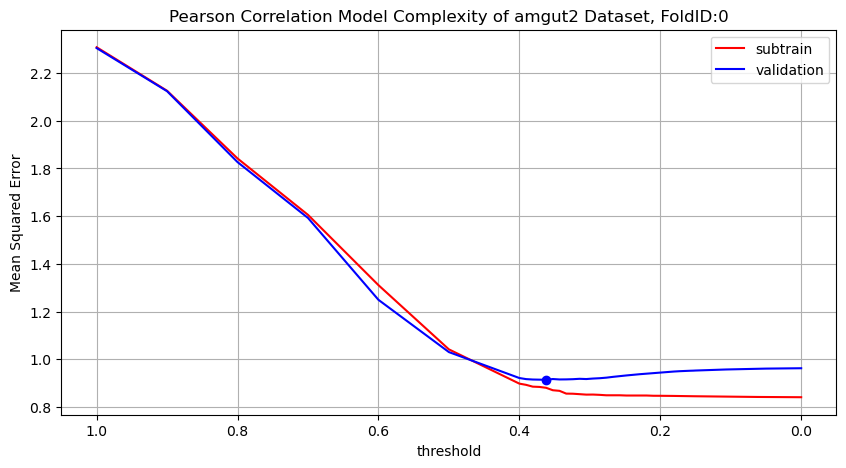

Best reg_param for amgut2 FoldID:1 is 0.381


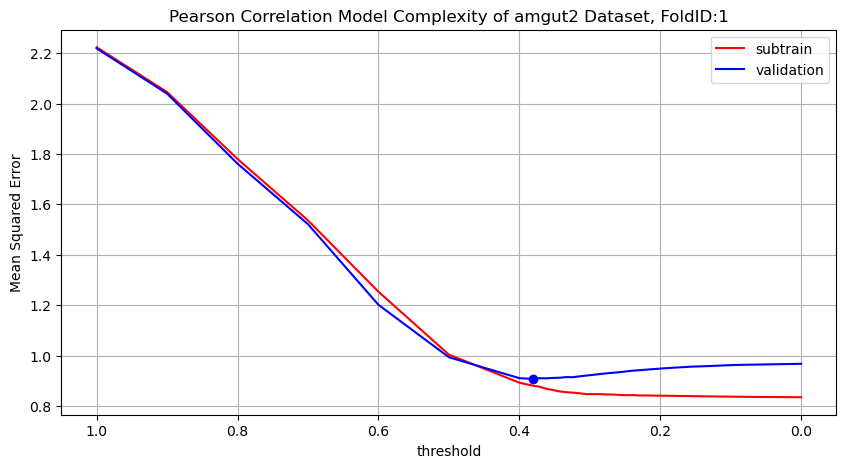

Best reg_param for amgut2 FoldID:2 is 0.3525


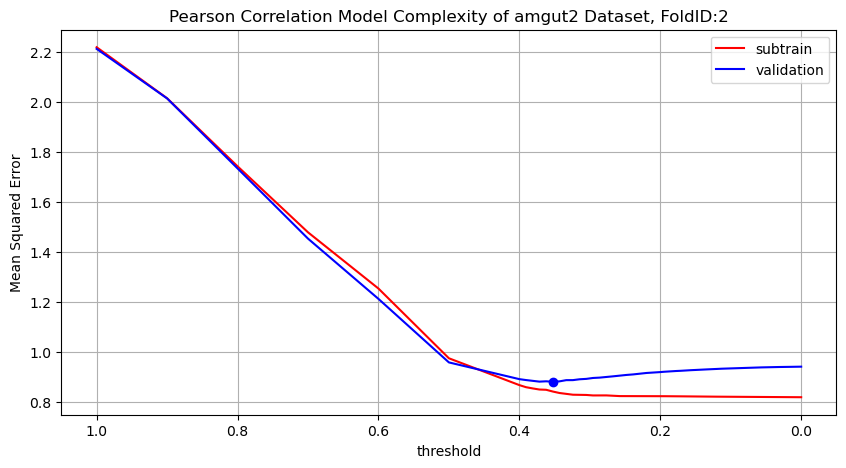

Best reg_param for glne007 FoldID:0 is 0.0306451612903225


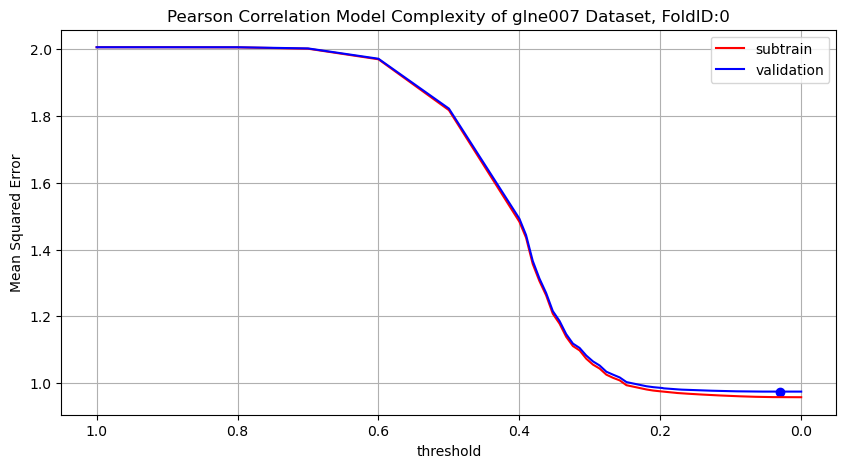

Best reg_param for glne007 FoldID:1 is 0.0306451612903225


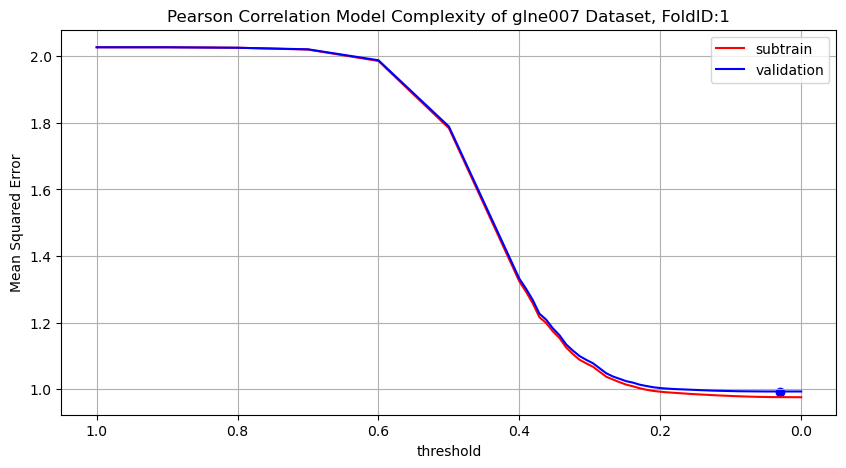

Best reg_param for glne007 FoldID:2 is 0.0274193548387096


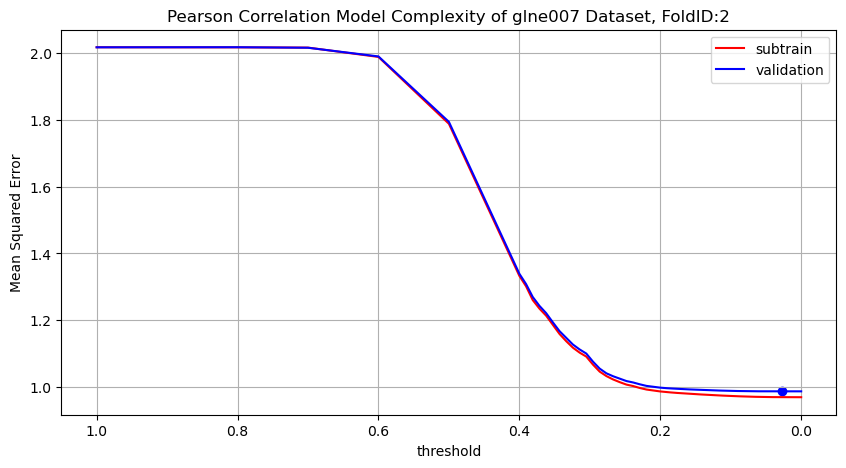

Best reg_param for amgut1 FoldID:0 is 0.132258064516129


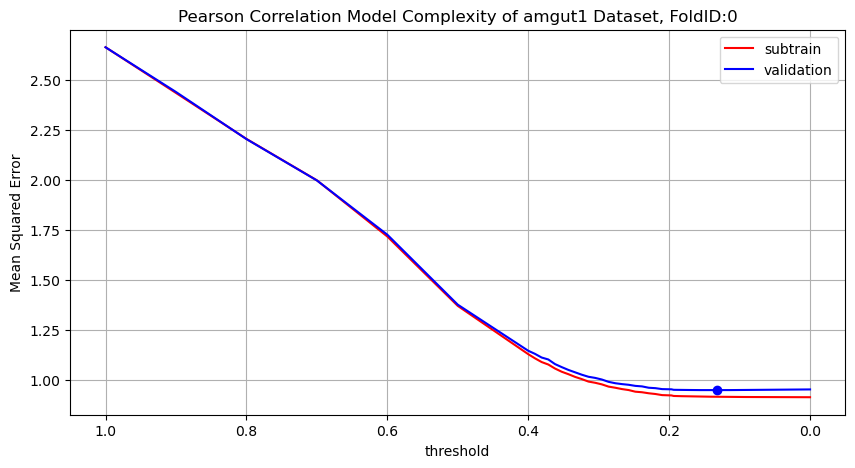

Best reg_param for amgut1 FoldID:1 is 0.1935483870967742


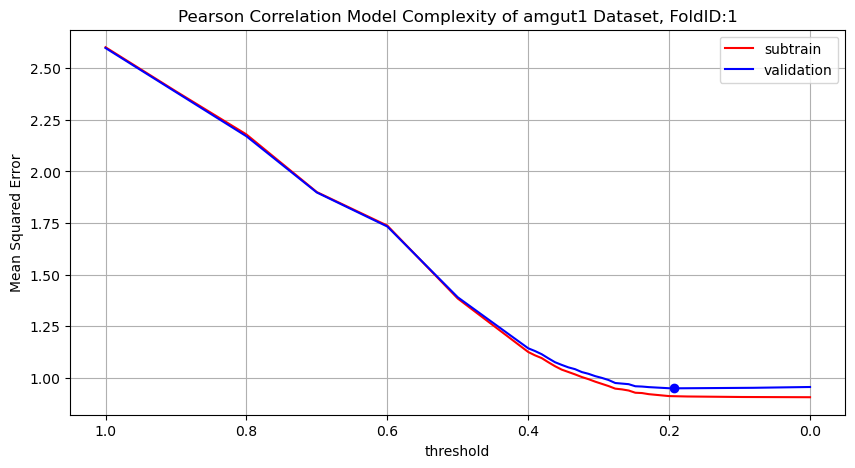

Best reg_param for amgut1 FoldID:2 is 0.1693548387096774


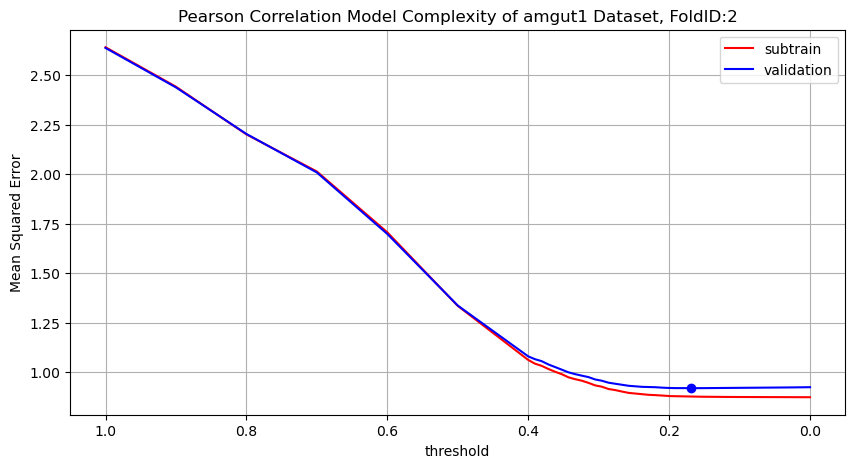

Best reg_param for soilrep FoldID:0 is 0.0693548387096774


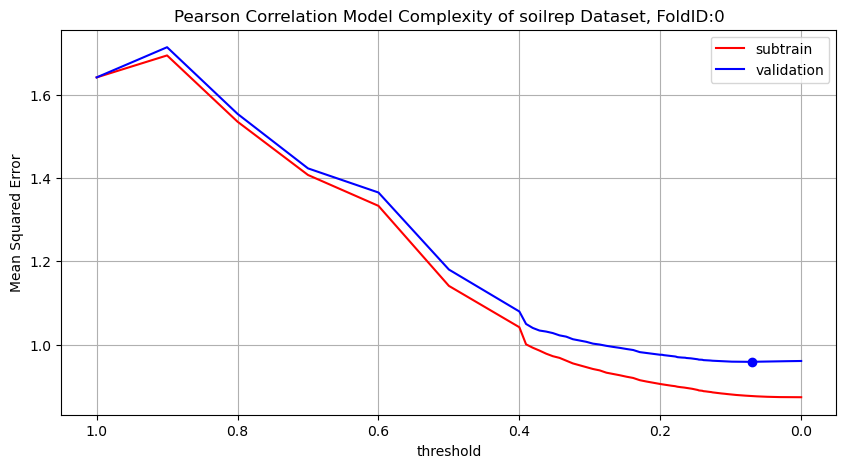

Best reg_param for soilrep FoldID:1 is 0.1032258064516129


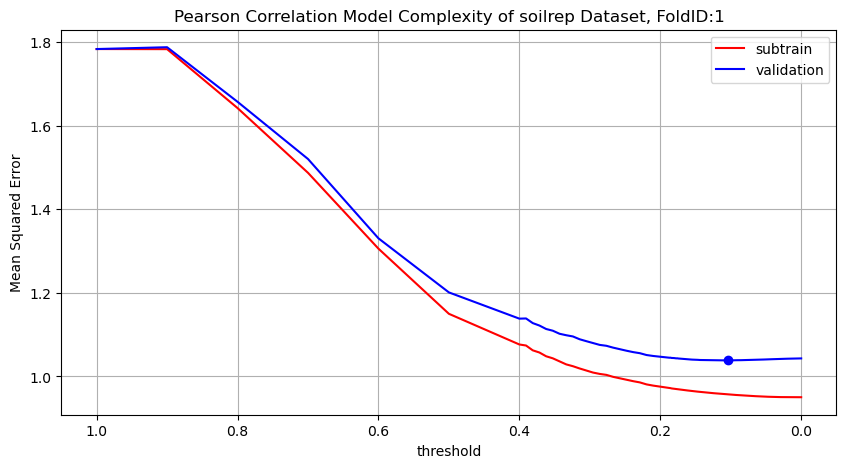

Best reg_param for soilrep FoldID:2 is 0.1


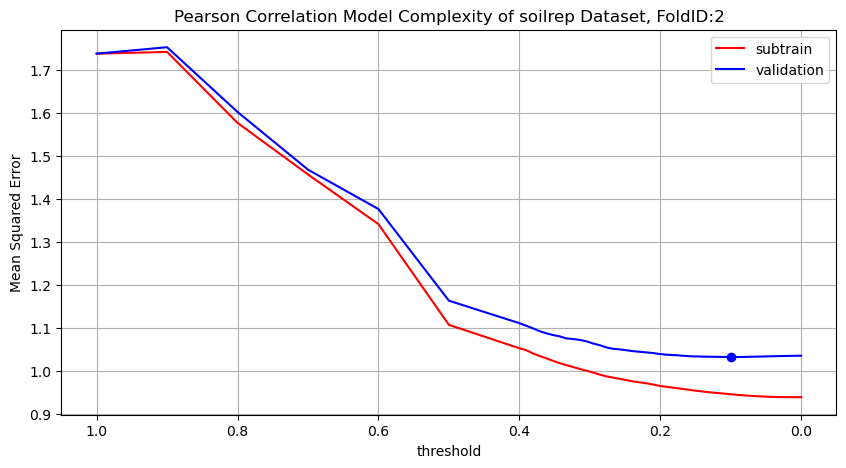

Best reg_param for mixmpln FoldID:0 is 0.0693548387096774


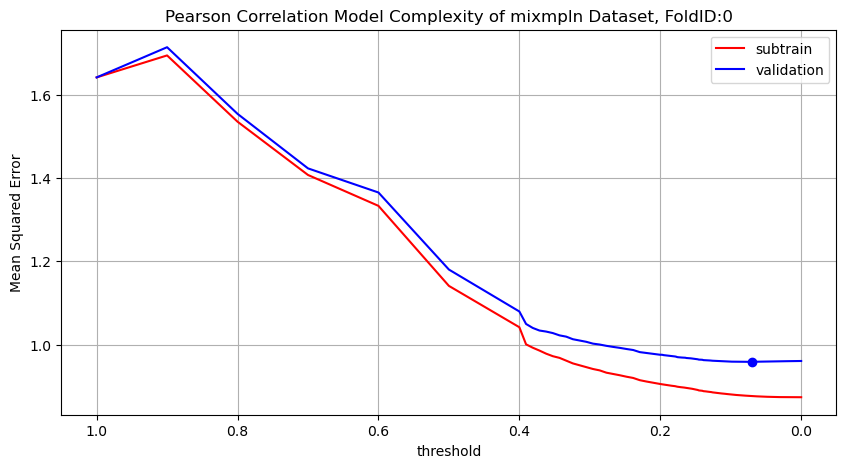

Best reg_param for mixmpln FoldID:1 is 0.1032258064516129


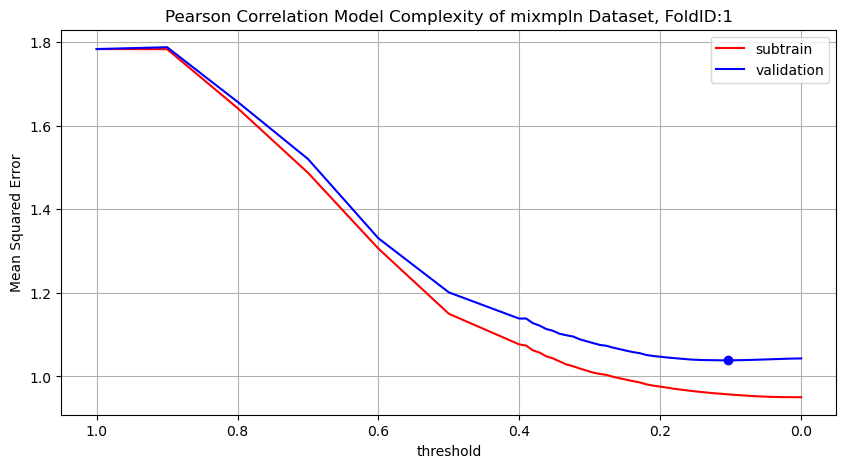

Best reg_param for mixmpln FoldID:2 is 0.1


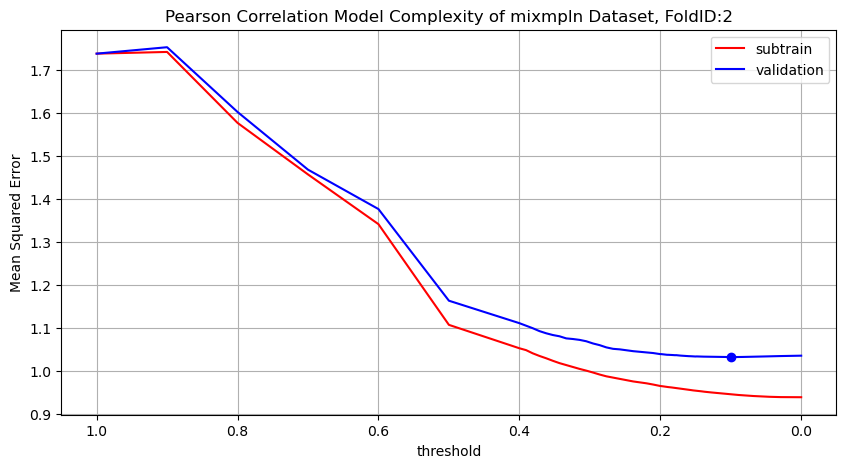

Best reg_param for baxter_crc FoldID:0 is 0.0193548387096774


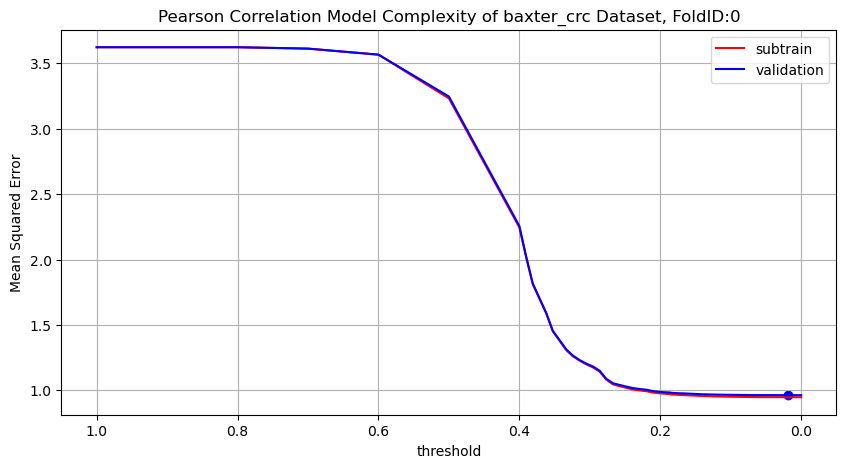

Best reg_param for baxter_crc FoldID:1 is 0.0


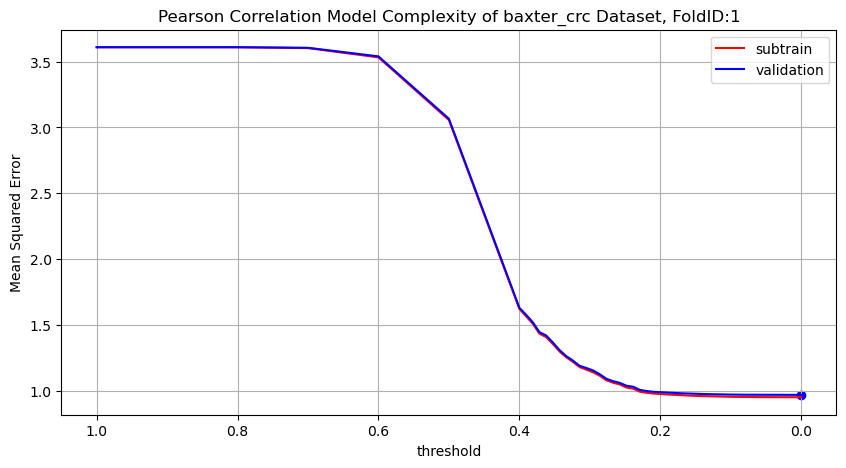

Best reg_param for baxter_crc FoldID:2 is 0.0129032258064516


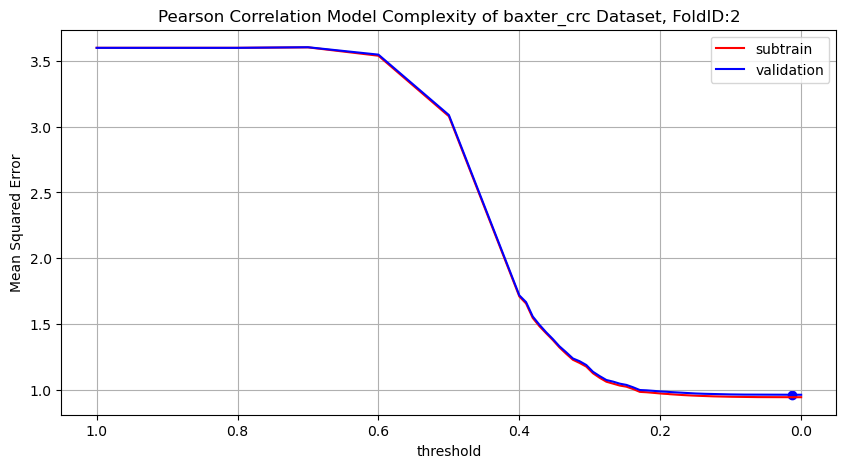

Best reg_param for ioral FoldID:0 is 0.1193548387096774


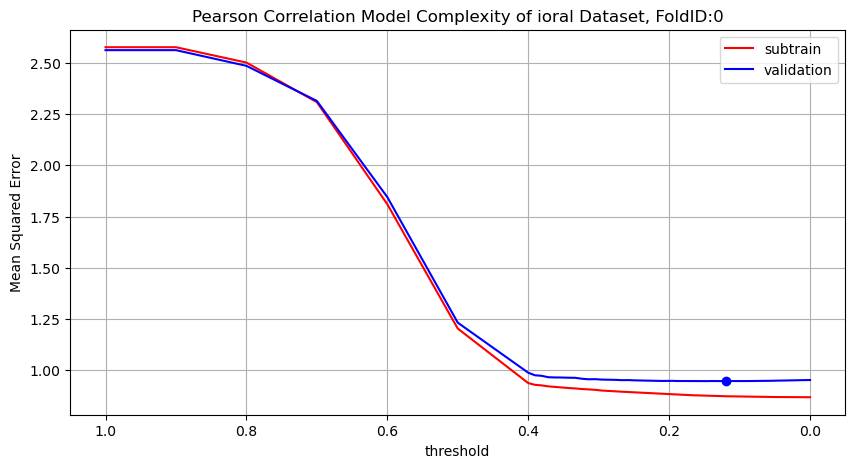

Best reg_param for ioral FoldID:1 is 0.0790322580645161


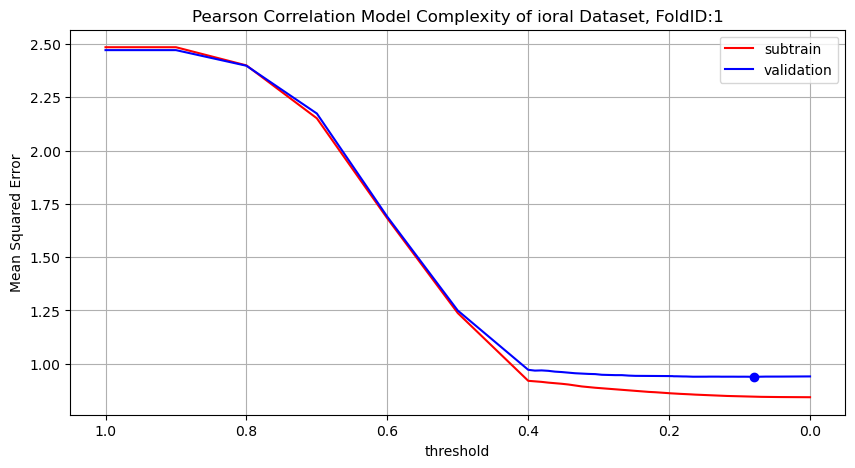

Best reg_param for ioral FoldID:2 is 0.1


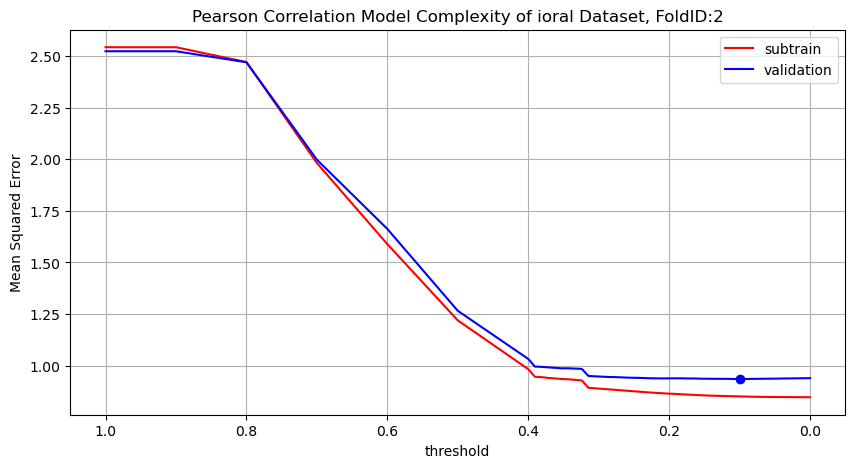

Best reg_param for hmp2prot FoldID:0 is 0.3525


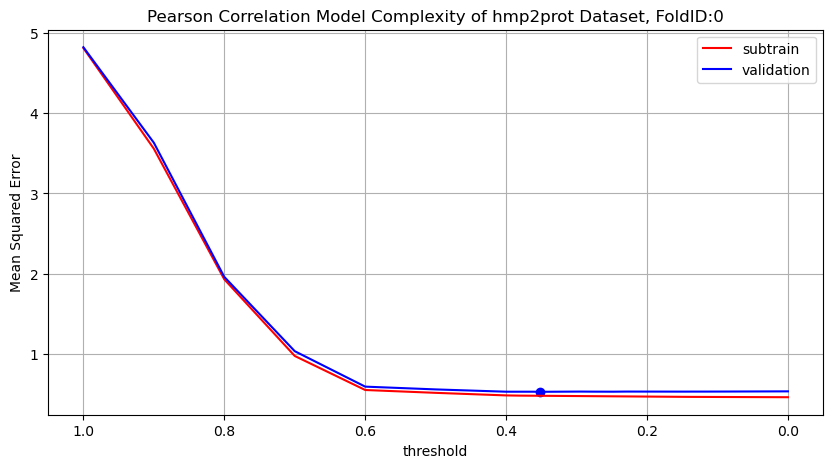

Best reg_param for hmp2prot FoldID:1 is 0.1177419354838709


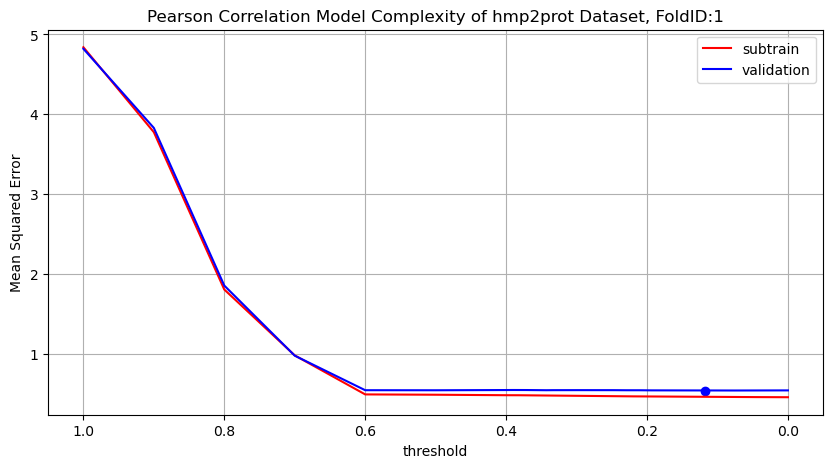

Best reg_param for hmp2prot FoldID:2 is 0.5


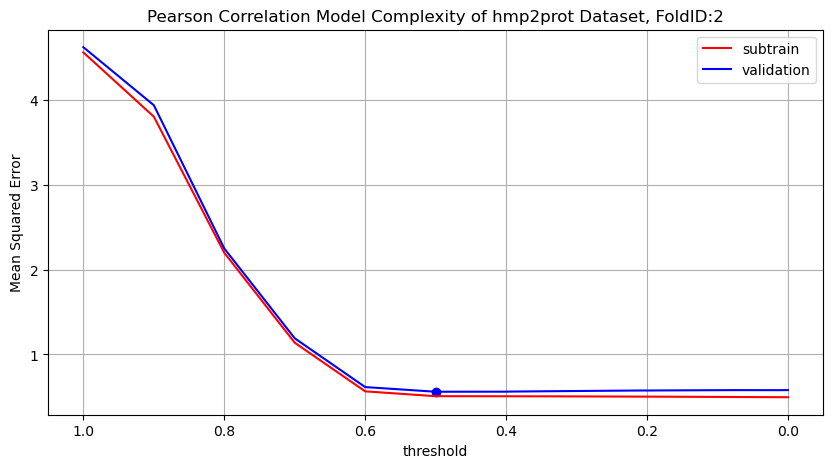

Best reg_param for hmp216S FoldID:0 is 0.2955


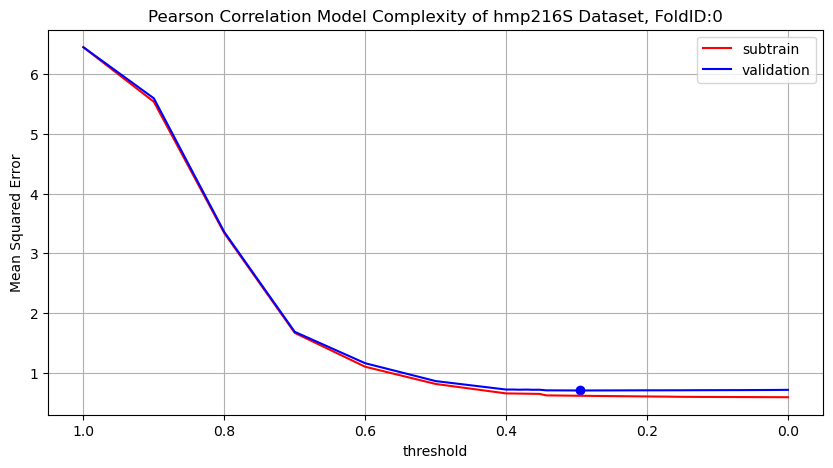

Best reg_param for hmp216S FoldID:1 is 0.0983870967741935


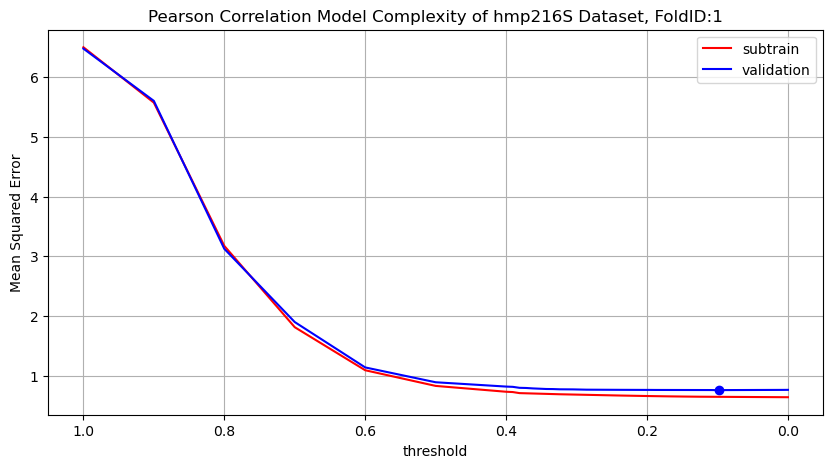

Best reg_param for hmp216S FoldID:2 is 0.15


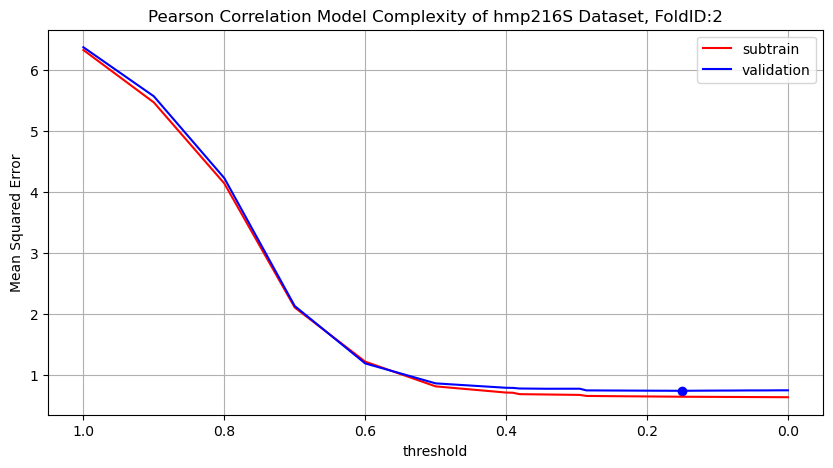

Best reg_param for crohns FoldID:0 is 0.1838709677419354


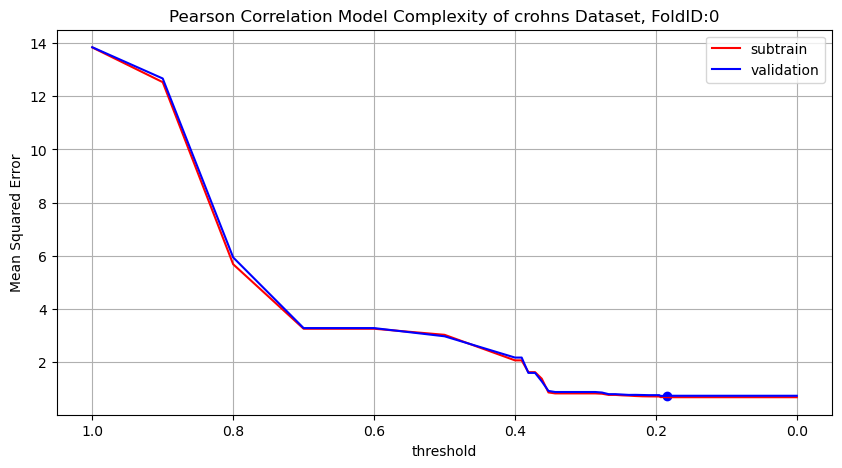

Best reg_param for crohns FoldID:1 is 0.0


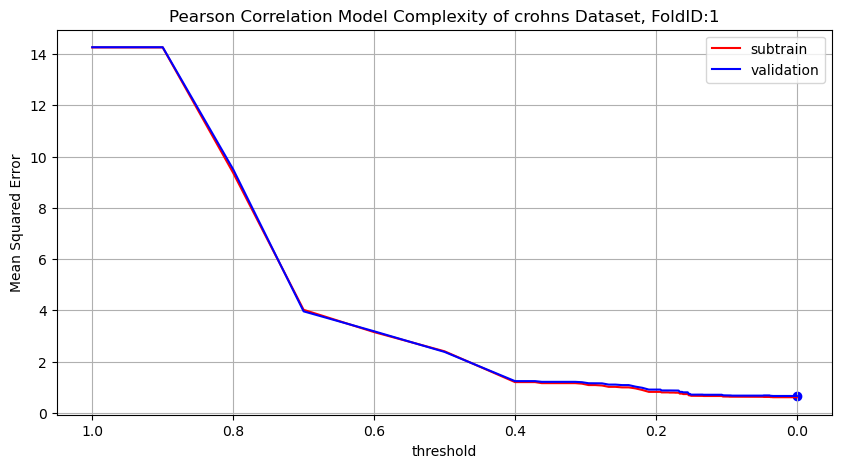

Best reg_param for crohns FoldID:2 is 0.0


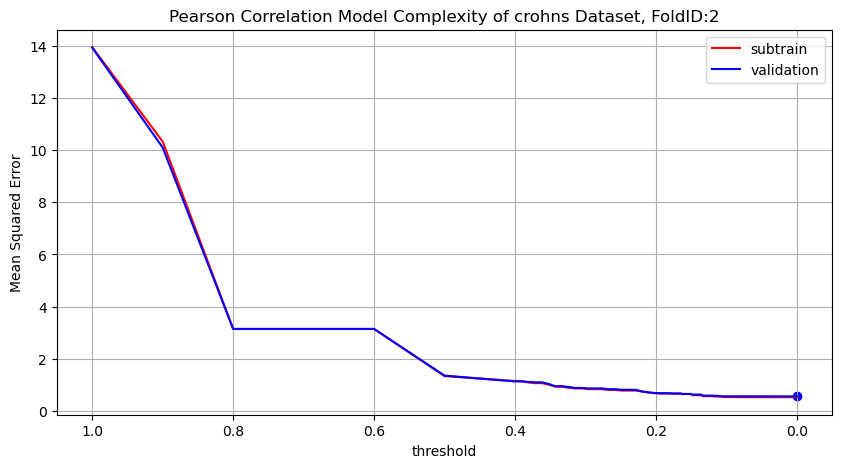

Best reg_param for amgut2 FoldID:0 is -1.0


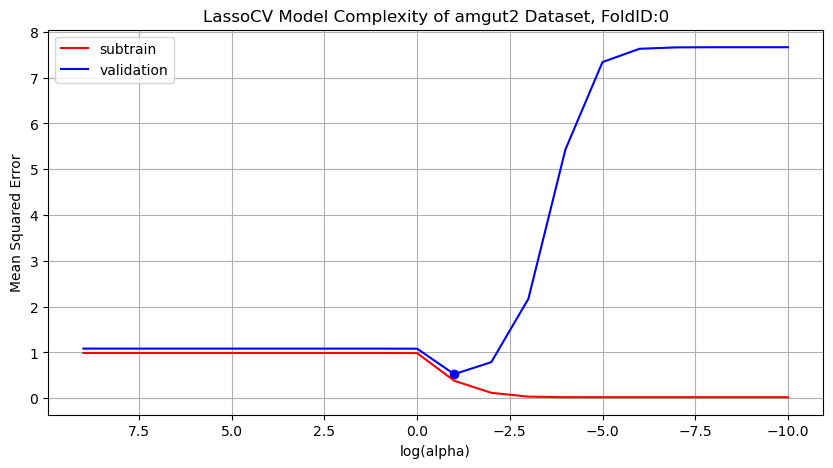

Best reg_param for amgut2 FoldID:1 is -1.0


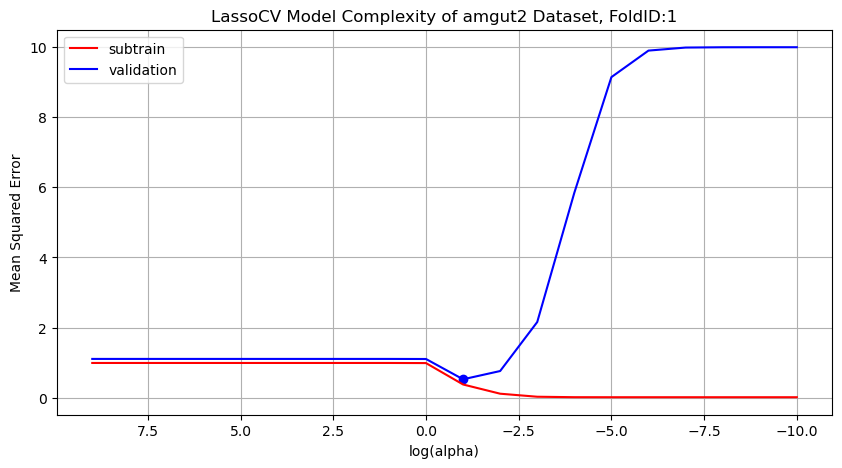

Best reg_param for amgut2 FoldID:2 is -1.0


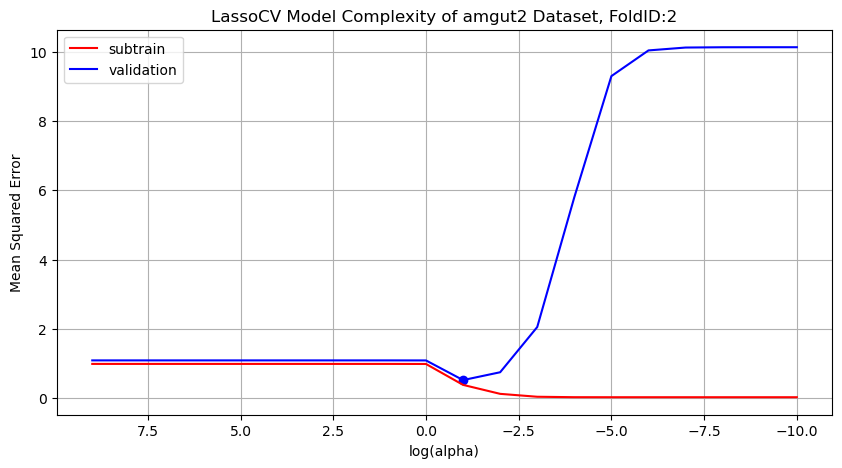

Best reg_param for glne007 FoldID:0 is -1.0


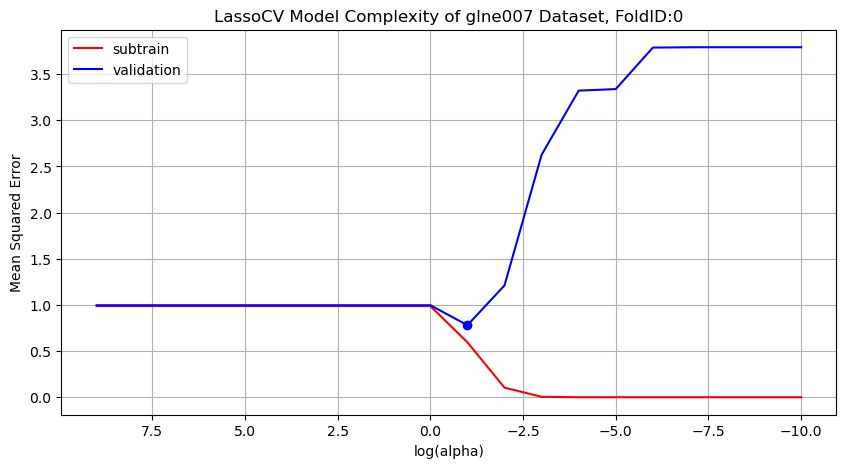

Best reg_param for glne007 FoldID:1 is -1.0


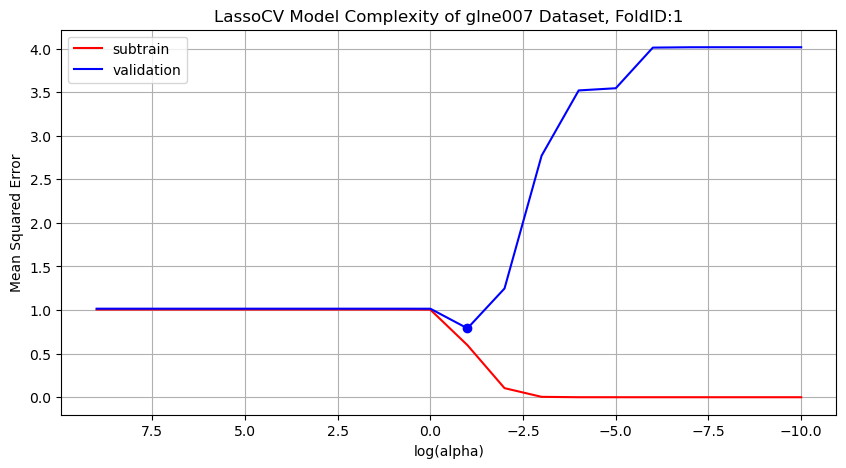

Best reg_param for glne007 FoldID:2 is -1.0


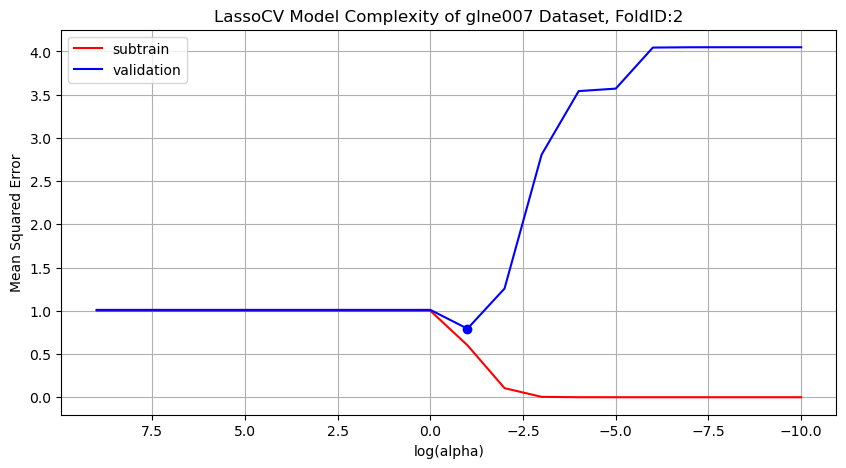

Best reg_param for amgut1 FoldID:0 is -1.0


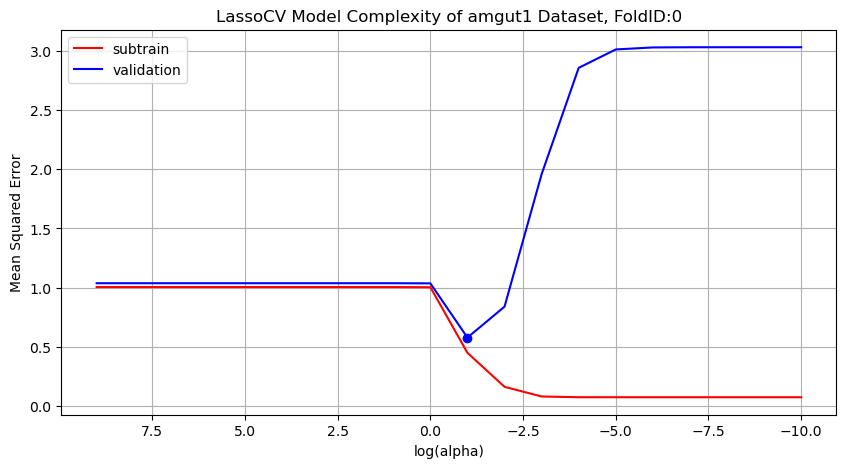

Best reg_param for amgut1 FoldID:1 is -1.0


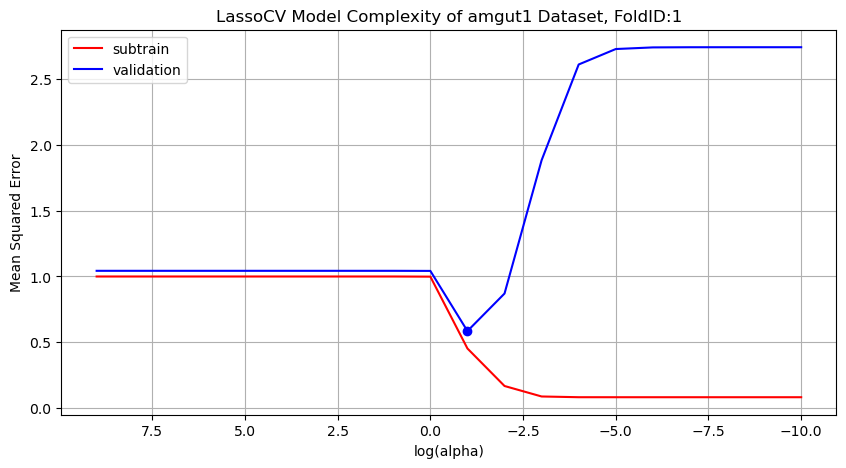

Best reg_param for amgut1 FoldID:2 is -1.0


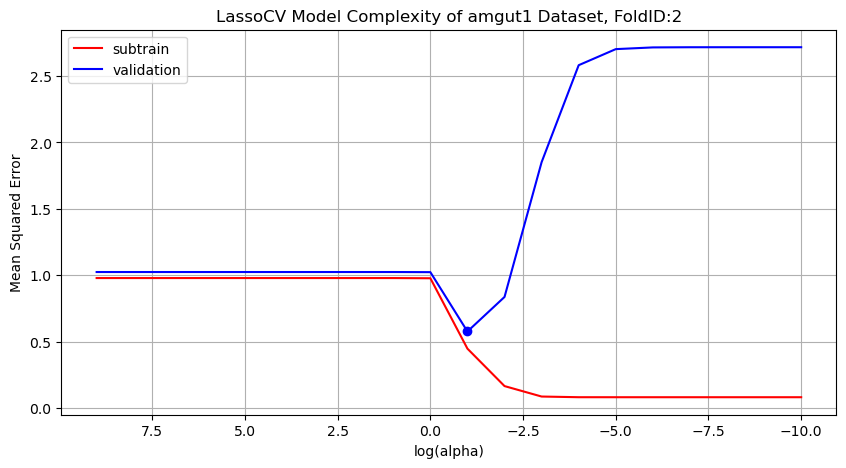

Best reg_param for soilrep FoldID:0 is -1.0


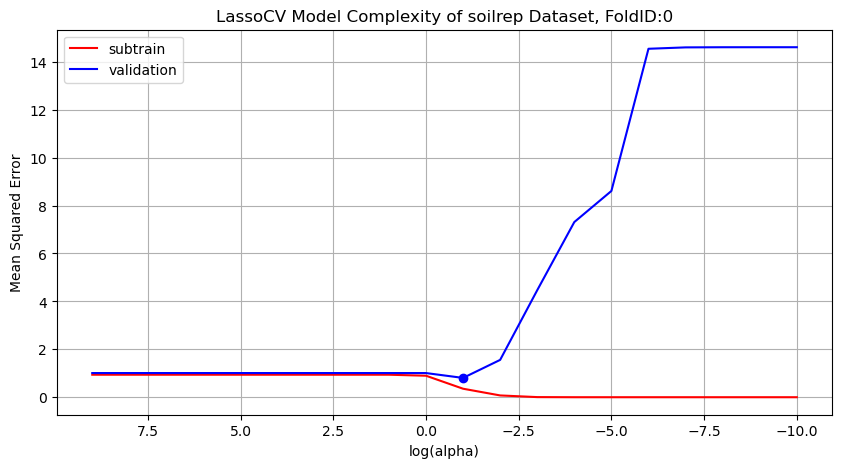

Best reg_param for soilrep FoldID:1 is -1.0


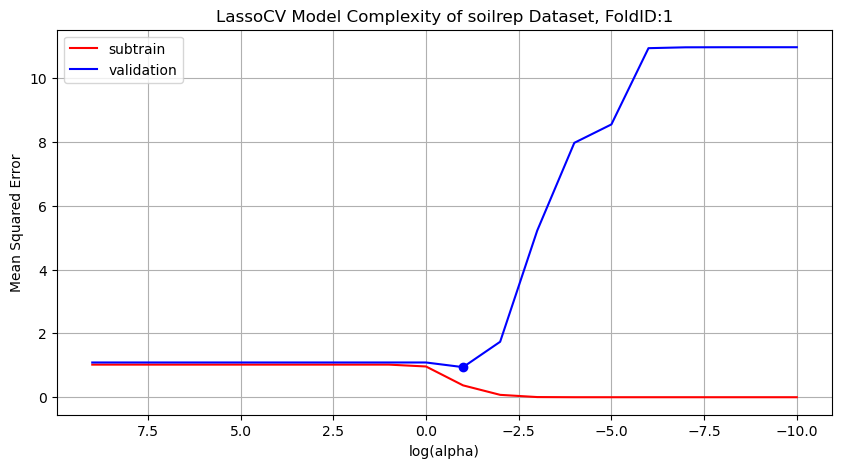

Best reg_param for soilrep FoldID:2 is -1.0


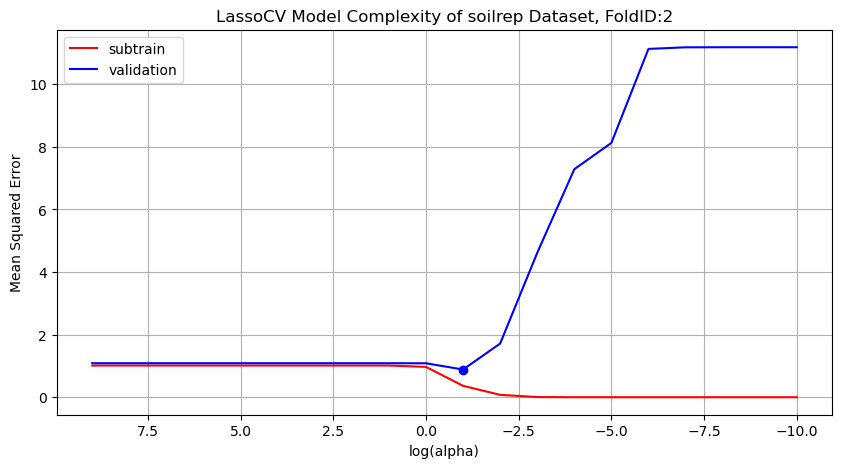

Best reg_param for mixmpln FoldID:0 is -1.0


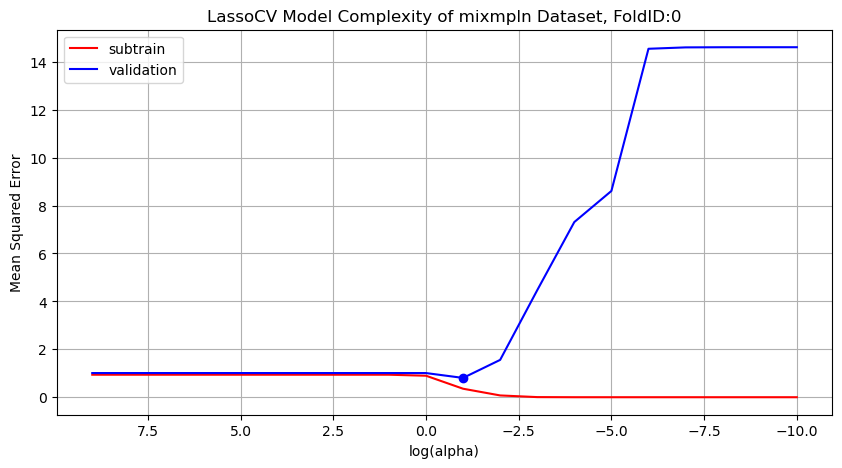

Best reg_param for mixmpln FoldID:1 is -1.0


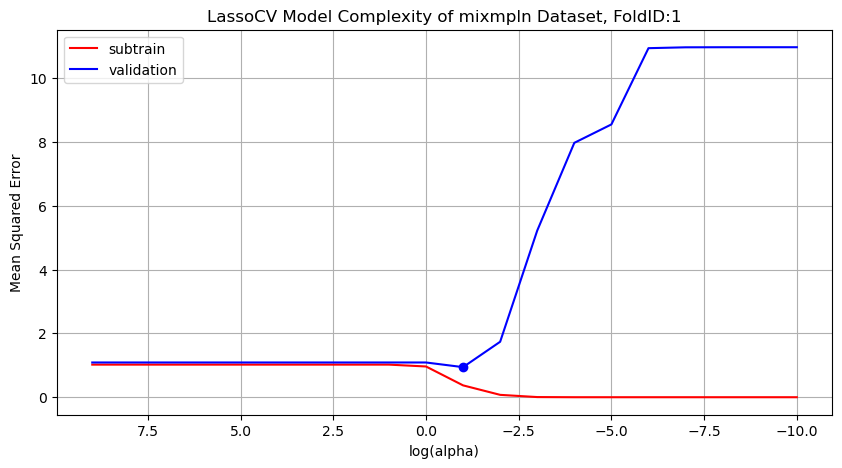

Best reg_param for mixmpln FoldID:2 is -1.0


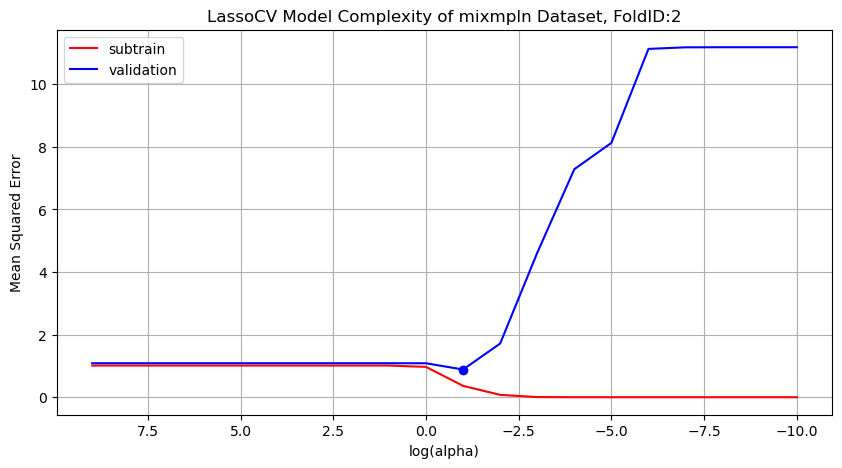

Best reg_param for baxter_crc FoldID:0 is -1.0


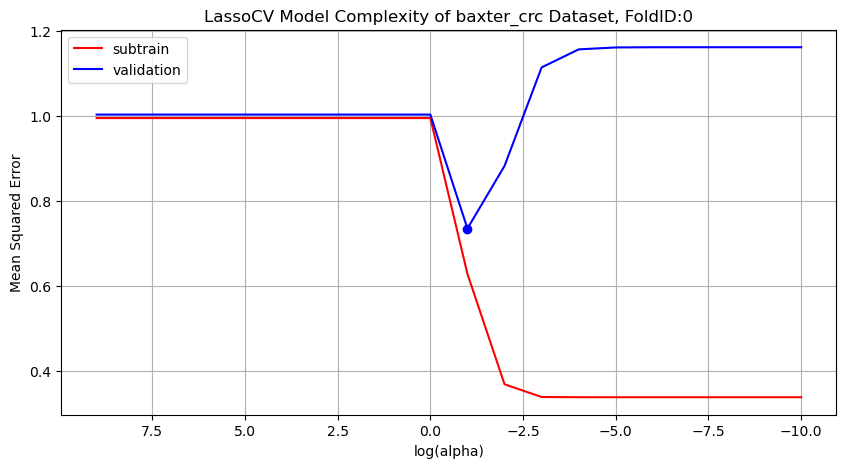

Best reg_param for baxter_crc FoldID:1 is -1.0


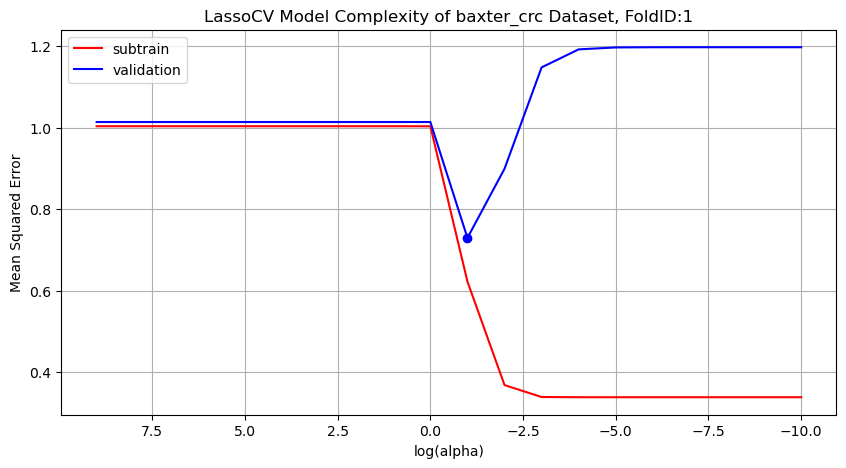

Best reg_param for baxter_crc FoldID:2 is -1.0


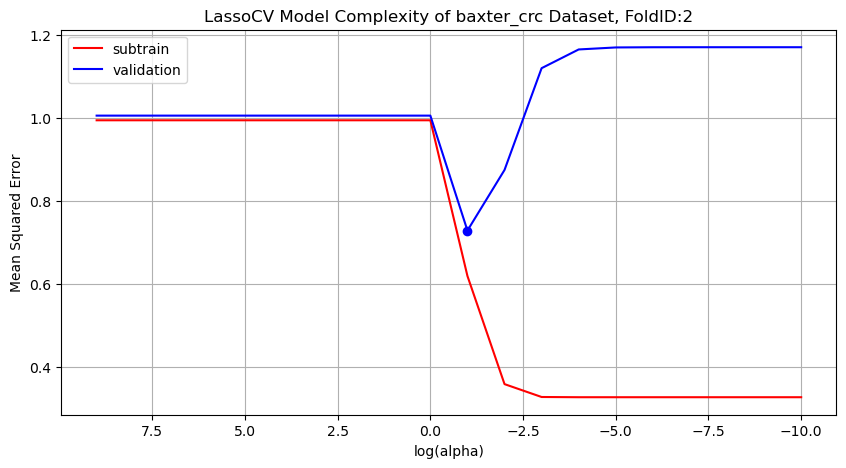

Best reg_param for ioral FoldID:0 is -1.0


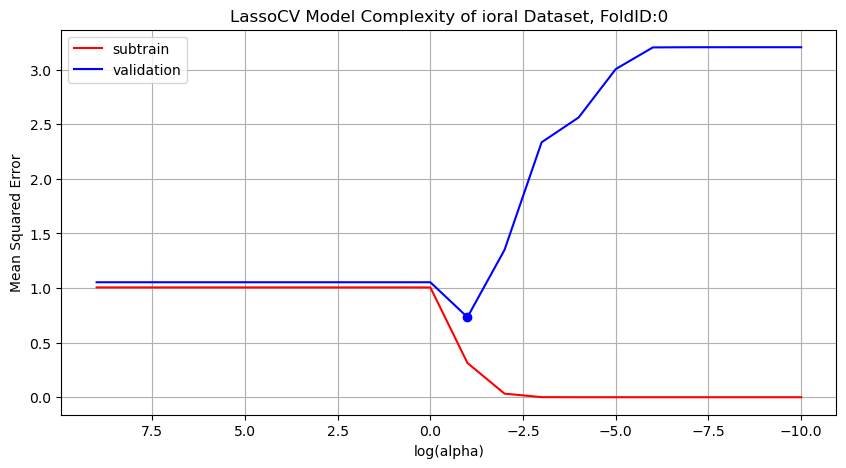

Best reg_param for ioral FoldID:1 is -1.0


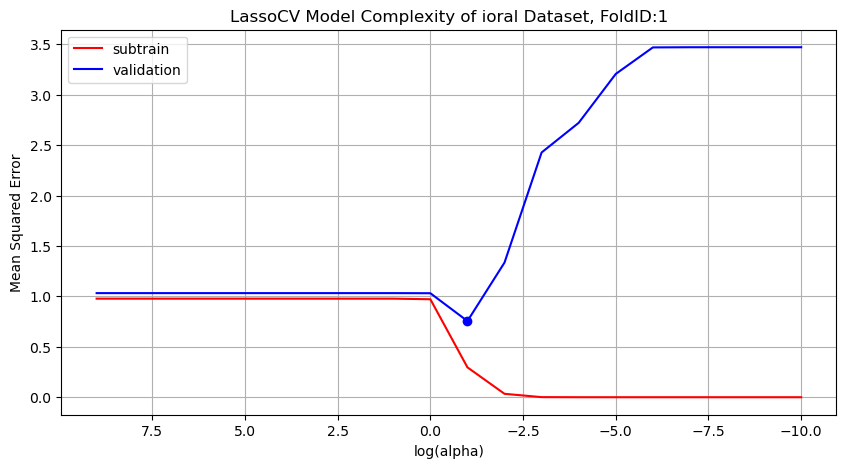

Best reg_param for ioral FoldID:2 is -1.0


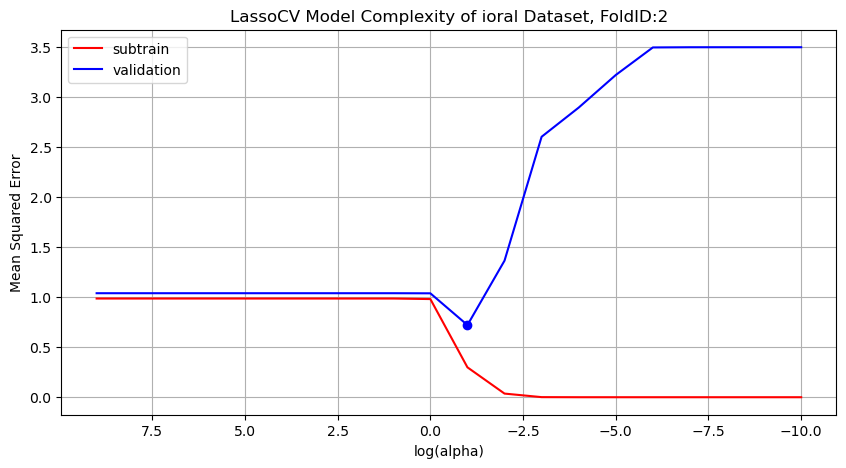

Best reg_param for hmp2prot FoldID:0 is -1.0


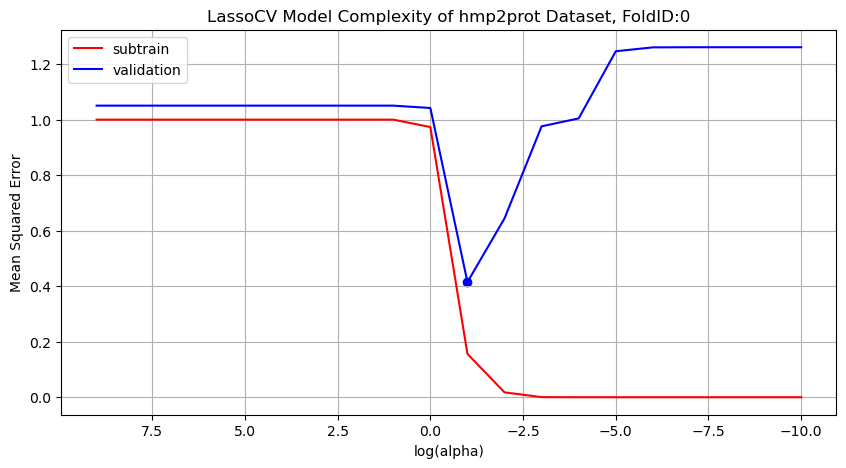

Best reg_param for hmp2prot FoldID:1 is -1.0


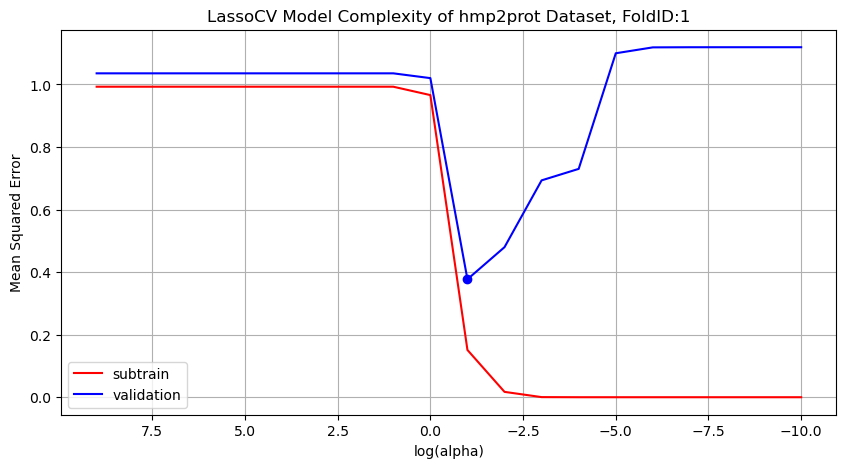

Best reg_param for hmp2prot FoldID:2 is -1.0


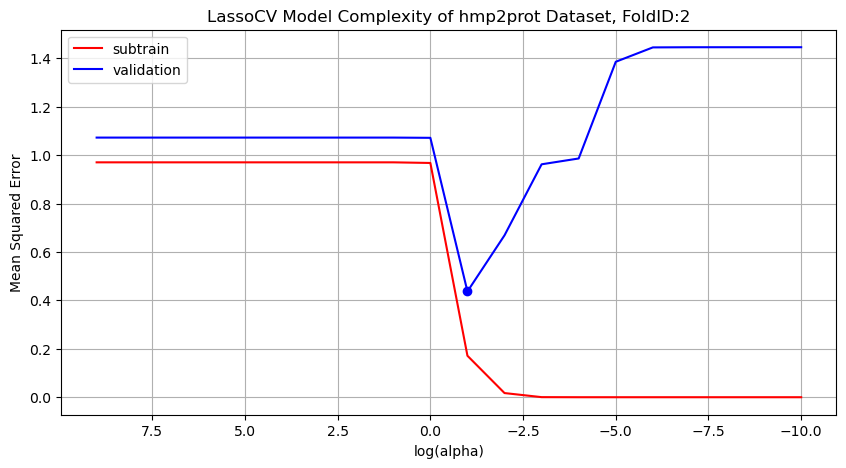

Best reg_param for hmp216S FoldID:0 is -1.0


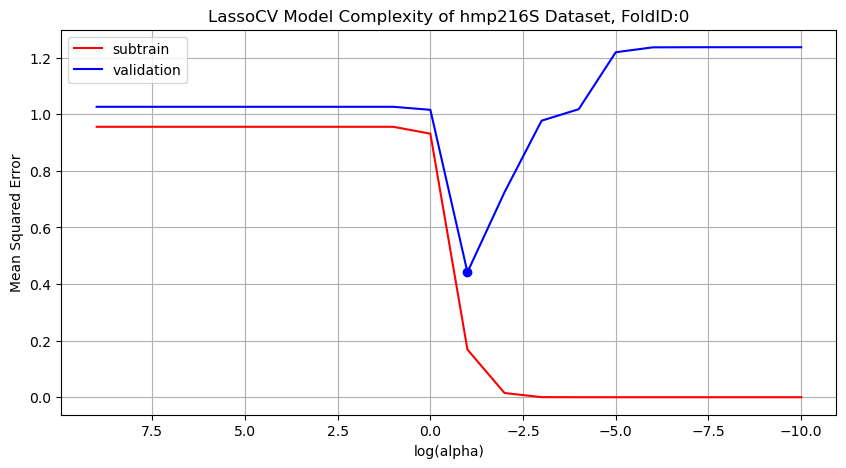

Best reg_param for hmp216S FoldID:1 is -1.0


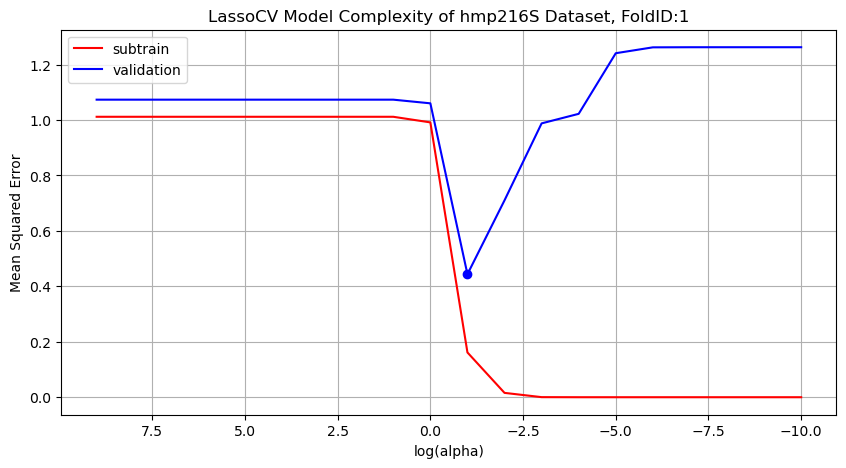

Best reg_param for hmp216S FoldID:2 is -1.0


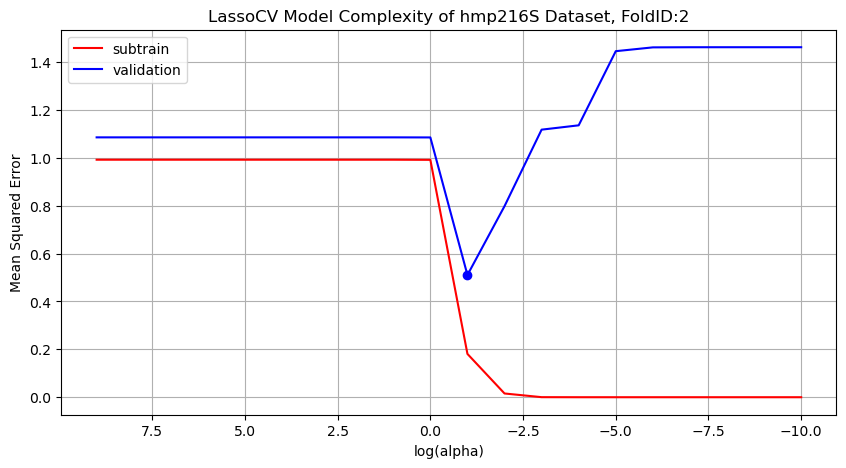

Best reg_param for crohns FoldID:0 is -1.0


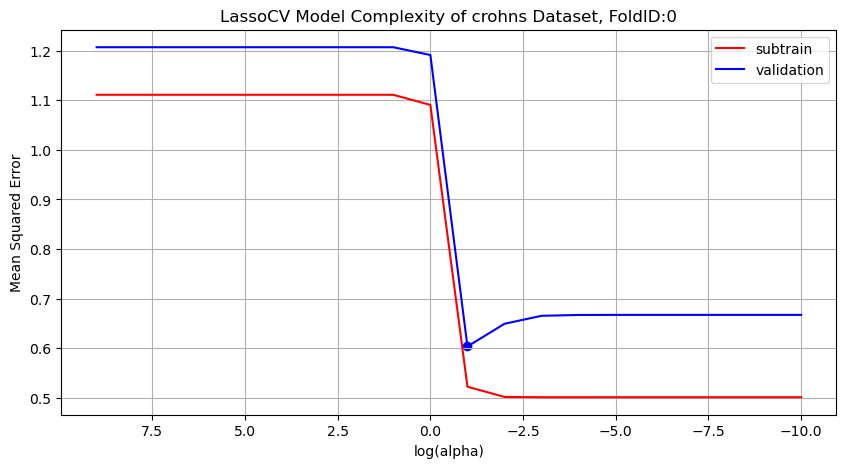

Best reg_param for crohns FoldID:1 is -1.0


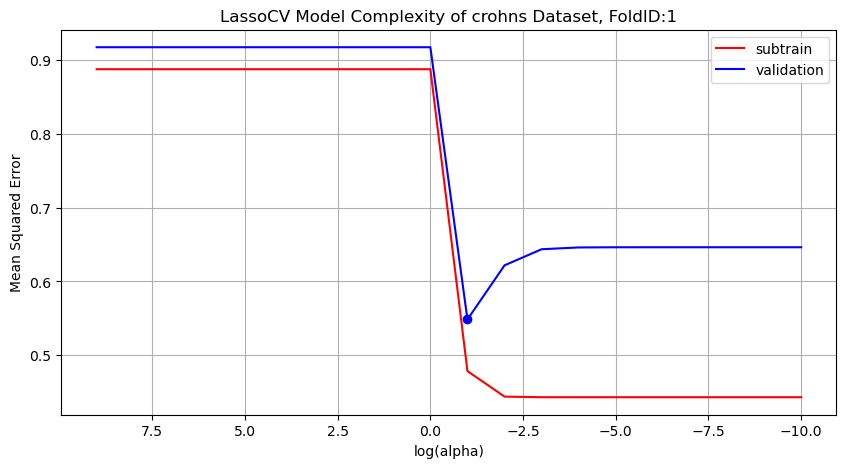

Best reg_param for crohns FoldID:2 is -1.0


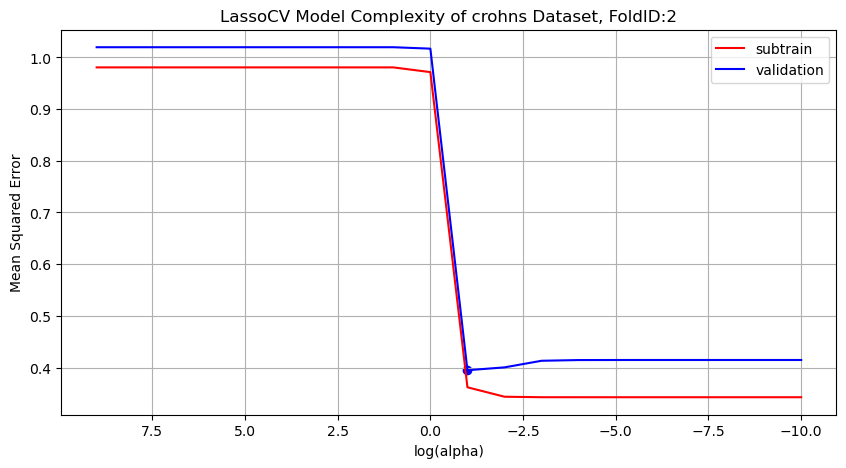

In [4]:
date_time = "2022-12-06_15:03"
# date_time = "2023-04-03_00:23"
# date_time = "2023-04-03_01:35"
# date_time = "2023-04-03_10:32"


model_complexity_df = pd.read_csv(f"/home/da2343/cs685_fall22/model_complexity/results/multi_alogrithms_model_complexity_results_{date_time}.csv")

algorithm_list = model_complexity_df["algorithm"].unique()

for algorithm in algorithm_list:
    filtered_algorithm_df = model_complexity_df[model_complexity_df["algorithm"] == algorithm]
    # Get unique values as list from column name `Dataset`
    dataset_list = filtered_algorithm_df["data_set_name"].unique().tolist()
    for dataset in dataset_list:
        # Get new dataframe with only the dataset
        sub_dataset_df = filtered_algorithm_df[filtered_algorithm_df["data_set_name"] == dataset]
        fold_id_list = sub_dataset_df["fold_id"].unique().tolist()
        
        for fold_id  in fold_id_list :
            test_error_df_list = []
            filtered_fold_id_df = sub_dataset_df[sub_dataset_df["fold_id"] == fold_id]
            
            reg_param_list = filtered_fold_id_df["reg_param"].unique().tolist()
            for reg_param in reg_param_list:
                filtered_reg_param = filtered_fold_id_df[filtered_fold_id_df["reg_param"] == reg_param]
                subtrain_score = filtered_reg_param['subtrain_loss'].mean()
                validation_score = filtered_reg_param['validation_loss'].mean()
        
                test_error_dict = {
                    'fold_id': fold_id,
                    'subtrain' :  subtrain_score,
                    'validation' : validation_score,
                    'data_set_name': dataset,
                    'reg_param': reg_param if algorithm == "Pearson Correlation" else np.log10(reg_param),
                    'algorithm' : algorithm,
                }
                test_error_df_list.append(pd.DataFrame(test_error_dict, index=[0]))
            test_err_df = pd.concat(test_error_df_list).reset_index()
            
            reg_param = "reg_param"
            # make a plot of the mean train score and mean test score for each reg_param
            test_err_df.plot(x=reg_param, y=['subtrain', 'validation'], title=f'{algorithm} Model Complexity of {dataset} Dataset, FoldID:{fold_id}', 
                             xlabel='log(alpha)' if algorithm == "LassoCV" else 'threshold', 
                             ylabel='Mean Squared Error', color = ['red', 'blue'],figsize=(10, 5),  grid=True, legend=True)
            
            # mark only the best reg_param with a blue dot
            # the best reg_param is the one that gives the minimum validation loss
            best_reg_param = test_err_df.loc[test_err_df['validation'].idxmin()]['reg_param']
            print(f"Best reg_param for {dataset} FoldID:{fold_id} is {best_reg_param}")
            plt.scatter(best_reg_param, test_err_df.loc[test_err_df['validation'].idxmin()]['validation'], color='blue')
            
            
            # plt.plot(test_err_df.iloc[clf.best_index_][reg_param], test_err_df.iloc[clf.best_index_]['validation'], 'bo', label='best reg_param', color='blue')
            # best_reg_param = test_err_df.loc[test_err_df['validation'].idxmin()]['reg_param']
            # plt.axvline(x=best_reg_param, color='black', linestyle='dashed', linewidth=1)
            #linspace
            # scale x axis from 1 to 0
            # plt.xlim(1, 0)
            #reverse the scale of the x axis,
            plt.gca().invert_xaxis()
            
            # save the plot
            # plt.savefig(f"/home/da2343/cs685_fall22/my_pearson_multicol/results/{algorithm}_{dataset}_foldid_{fold_id}_model_complexity.png")
            plt.show()
        
            